In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


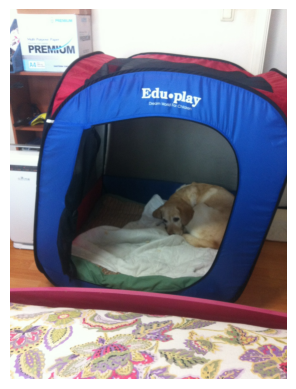

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Directory where the images are stored
image_dir = "/content/drive/MyDrive/Colab Notebooks/train"

# Load a sample image
image_path = os.path.join(image_dir, "VizWiz_train_00011135.jpg")

img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()


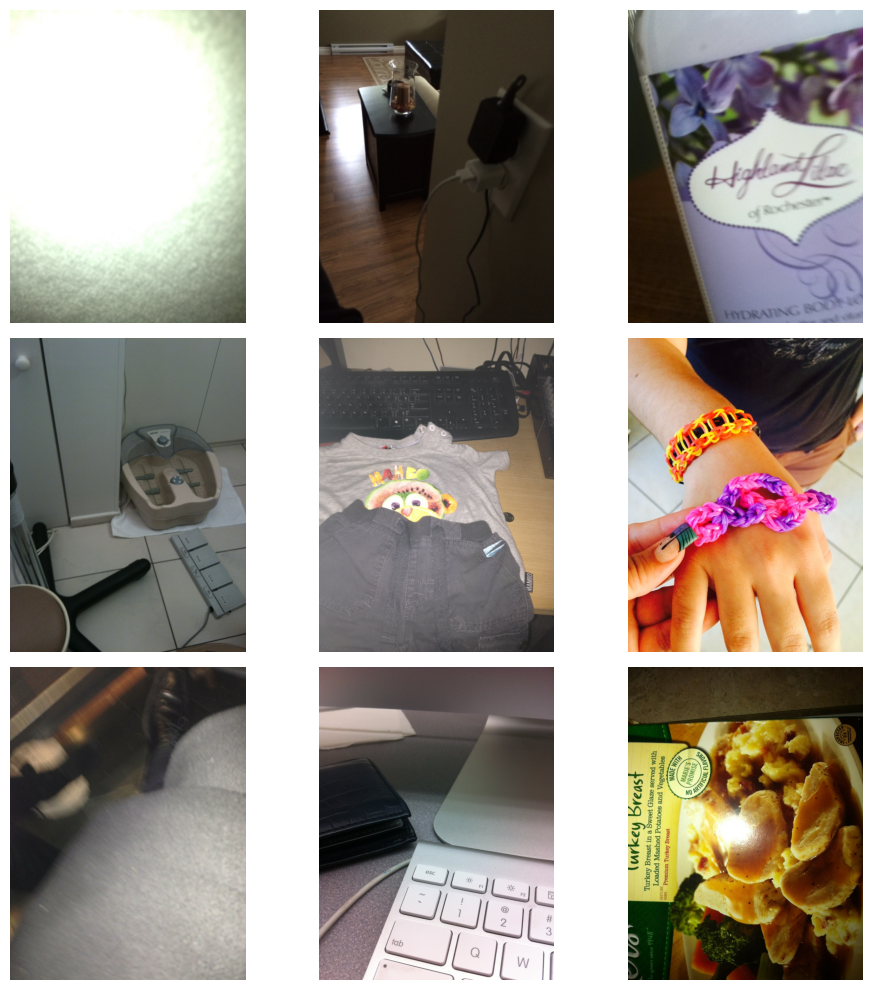

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to plot multiple images in a grid
def plot_images(image_dir, num_images=9):
    plt.figure(figsize=(10, 10))

    # Load and display 'num_images' from the directory
    for i, filename in enumerate(os.listdir(image_dir)[:num_images]):
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)

        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize images
plot_images(image_dir, num_images=9)  # Change num_images to adjust the number of images


In [ ]:
import json

# Load the JSON file
with open('/content/drive/MyDrive/Colab Notebooks/questions/train.json', 'r') as f:
    data = json.load(f)

# Check the structure of the first entry
print(f"Image: {data[0]['image']}")
print(f"Question: {data[0]['question']}")
print(f"Answers: {data[0]['answers']}")


Image: VizWiz_train_00000000.jpg
Question: What's the name of this product?
Answers: [{'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil'}, {'answer_confidence': 'yes', 'answer': 'basil'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil'}]


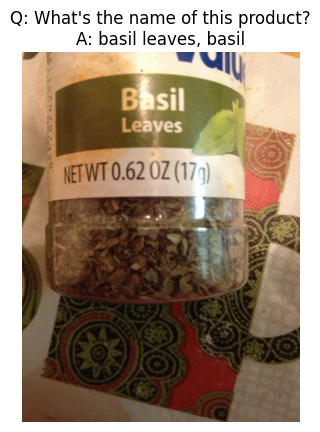

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Set the directory where images are stored
image_dir = '/content/drive/MyDrive/Colab Notebooks/train'

# Function to extract unique answers
def get_unique_answers(answers):
    return list(set([ans['answer'] for ans in answers]))

# Example: Load and display the first image with its question and answers
image_file = data[0]['image']  # Get the image filename from the JSON
question = data[0]['question']  # Get the question
answers = get_unique_answers(data[0]['answers'])  # Get unique answers

# Construct the path to the image
image_path = os.path.join(image_dir, image_file)

# Open and display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title(f"Q: {question}\nA: {', '.join(answers)}")
plt.show()


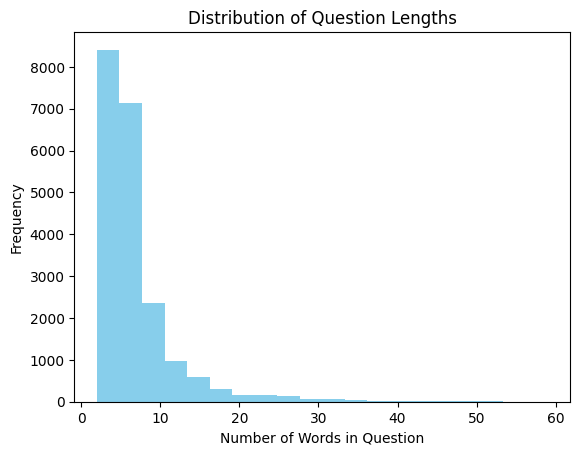

In [ ]:
# Get the length of each question (in words)
question_lengths = [len(item['question'].split()) for item in data]

# Plot the distribution of question lengths
plt.hist(question_lengths, bins=20, color='skyblue')
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of Words in Question')
plt.ylabel('Frequency')
plt.show()


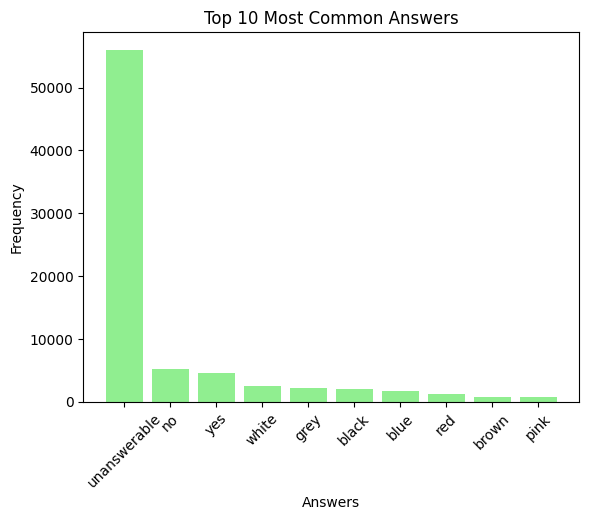

In [ ]:
from collections import Counter

# Extract all answers
all_answers = [ans['answer'] for item in data for ans in item['answers']]
answer_counts = Counter(all_answers)

# Extract the top 10 most common answers
labels, values = zip(*answer_counts.most_common(10))

# Plot a bar chart of the top answers
plt.bar(labels, values, color='lightgreen')
plt.title('Top 10 Most Common Answers')
plt.xlabel('Answers')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


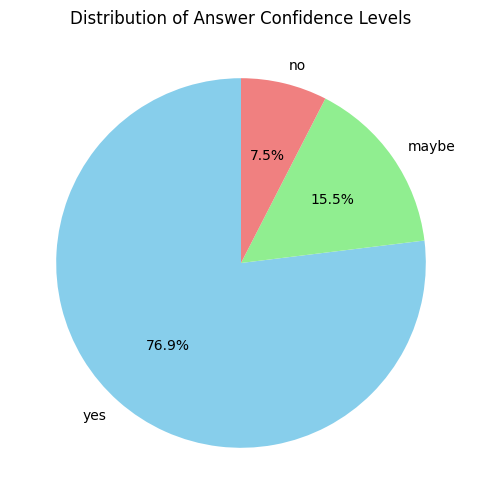

In [ ]:
from collections import Counter

# Extract confidence levels from all answers
confidence_levels = [ans['answer_confidence'] for item in data for ans in item['answers']]

# Count occurrences of each confidence level
confidence_counts = Counter(confidence_levels)

# Create the pie chart
labels, sizes = zip(*confidence_counts.items())
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Answer Confidence Levels')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


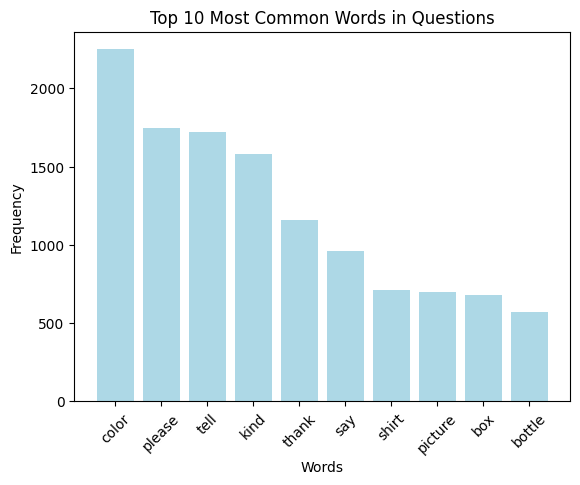

In [ ]:
from collections import Counter
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

# Download stopwords if not already installed
nltk.download('stopwords')

# Extract all words from questions, removing stopwords
stop_words = set(stopwords.words('english'))
all_words = []

for item in data:
    words = re.findall(r'\w+', item['question'].lower())  # Split into words and lowercase
    all_words.extend([word for word in words if word not in stop_words])

# Get the most common words
word_counts = Counter(all_words)
common_words = word_counts.most_common(10)

# Extract labels and counts
labels, values = zip(*common_words)

# Plot bar chart
plt.bar(labels, values, color='lightblue')
plt.title('Top 10 Most Common Words in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


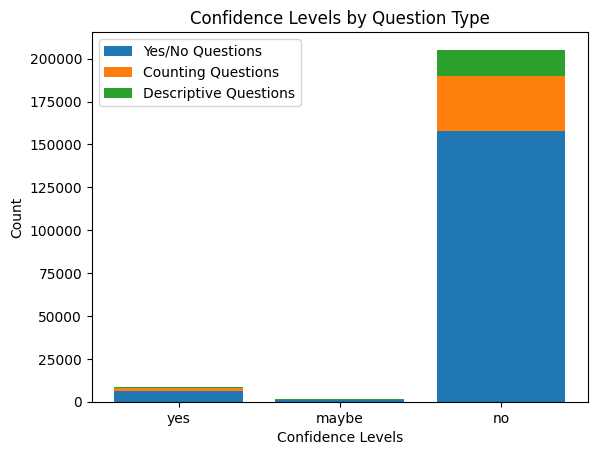

In [ ]:
import numpy as np

# Categorize questions by type and collect confidence levels
yes_no_confidences = [ans['answer_confidence'] for item in data if 'yes' in item['question'].lower() or 'no' in item['question'].lower() for ans in item['answers']]
counting_confidences = [ans['answer_confidence'] for item in data if 'how many' in item['question'].lower() for ans in item['answers']]
descriptive_confidences = [ans['answer_confidence'] for item in data if item['question'].lower() not in ['yes', 'no', 'how many'] for ans in item['answers']]

# Count confidence levels for each category
confidence_labels = ['yes', 'maybe', 'no']
yes_no_counts = [yes_no_confidences.count(c) for c in confidence_labels]
counting_counts = [counting_confidences.count(c) for c in confidence_labels]
descriptive_counts = [descriptive_confidences.count(c) for c in confidence_labels]

# Stacked bar chart data
counts = np.array([yes_no_counts, counting_counts, descriptive_counts])

# Plot stacked bar chart
fig, ax = plt.subplots()
ax.bar(confidence_labels, counts[:, 0], label='Yes/No Questions')
ax.bar(confidence_labels, counts[:, 1], bottom=counts[:, 0], label='Counting Questions')
ax.bar(confidence_labels, counts[:, 2], bottom=counts[:, 0] + counts[:, 1], label='Descriptive Questions')

ax.set_xlabel('Confidence Levels')
ax.set_ylabel('Count')
ax.set_title('Confidence Levels by Question Type')
ax.legend()

plt.show()


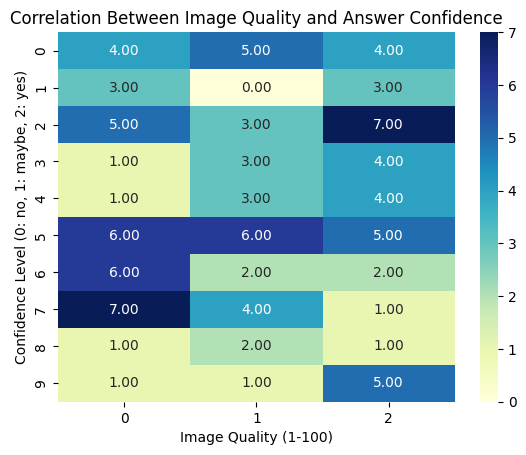

In [ ]:
import seaborn as sns
import numpy as np

# Assume 'image_quality' and 'answer_confidence' fields exist
# Randomly generate some sample image quality and confidence data for this example
image_quality = np.random.randint(1, 100, size=100)
confidence_levels = np.random.randint(0, 3, size=100)  # 0: no, 1: maybe, 2: yes

# Create a 2D histogram (heatmap)
heatmap_data = np.histogram2d(image_quality, confidence_levels, bins=[10, 3])

# Plot heatmap
sns.heatmap(heatmap_data[0], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Correlation Between Image Quality and Answer Confidence')
plt.xlabel('Image Quality (1-100)')
plt.ylabel('Confidence Level (0: no, 1: maybe, 2: yes)')
plt.show()


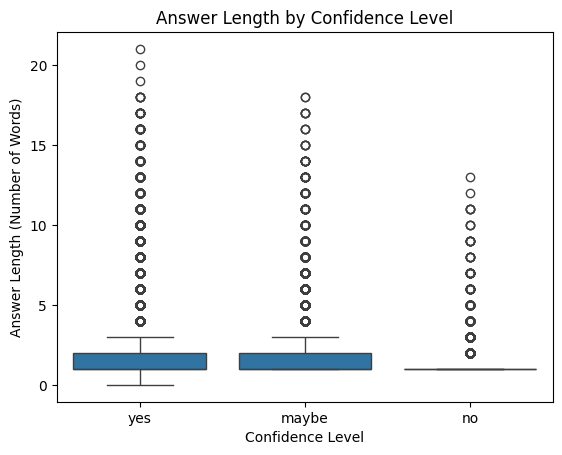

In [ ]:
import seaborn as sns

# Collect answer lengths and confidence levels
answer_lengths = [len(ans['answer'].split()) for item in data for ans in item['answers']]
confidence_levels = [ans['answer_confidence'] for item in data for ans in item['answers']]

# Create a boxplot
sns.boxplot(x=confidence_levels, y=answer_lengths)
plt.title('Answer Length by Confidence Level')
plt.xlabel('Confidence Level')
plt.ylabel('Answer Length (Number of Words)')
plt.show()


In [ ]:
import pandas as pd
import json
import os

# Path to your dataset (adjust accordingly if in Google Drive or another directory)
dataset_path = '/content/drive/MyDrive/Colab Notebooks/questions/train.json'

# Load the full dataset
with open(dataset_path) as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)
print(f"Full dataset loaded with {df.shape[0]} rows.")


Full dataset loaded with 20523 rows.


In [ ]:
# Sample 5,000 random rows from the dataset
subset_size = 5000
df_subset = df.sample(n=subset_size, random_state=42).reset_index(drop=True)

# Display the first few rows of the subset to verify
df_subset.head()
print(f"Subset created with {df_subset.shape[0]} rows.")


Subset created with 5000 rows.


In [ ]:
# Save the subset to a new JSON file
subset_path = '/content/drive/MyDrive/Colab Notebooks/questions/train_subset.json'
df_subset.to_json(subset_path, orient='records', lines=True)
print(f"Subset saved to {subset_path}")


Subset saved to /content/drive/MyDrive/Colab Notebooks/questions/train_subset.json


In [ ]:
# Basic summary statistics for the subset
print("Number of unanswerable questions in the subset:", df_subset[df_subset['answerable'] == 0].shape[0])

# Question length statistics
df_subset['question_length'] = df_subset['question'].apply(len)
print(df_subset['question_length'].describe())

# Number of unique answers
# Convert list of answers to tuples for hashing, but only using the 'answer' key
# This assumes that the dictionaries in 'answers' always have an 'answer' key
df_subset['answers_tuple'] = df_subset['answers'].apply(lambda x: tuple(d['answer'] for d in x))
print("Unique answers in the subset:", df_subset['answers_tuple'].nunique())

Number of unanswerable questions in the subset: 1350
count    5000.000000
mean       32.331000
std        26.440062
min         6.000000
25%        18.000000
50%        25.000000
75%        36.000000
max       268.000000
Name: question_length, dtype: float64
Unique answers in the subset: 4784


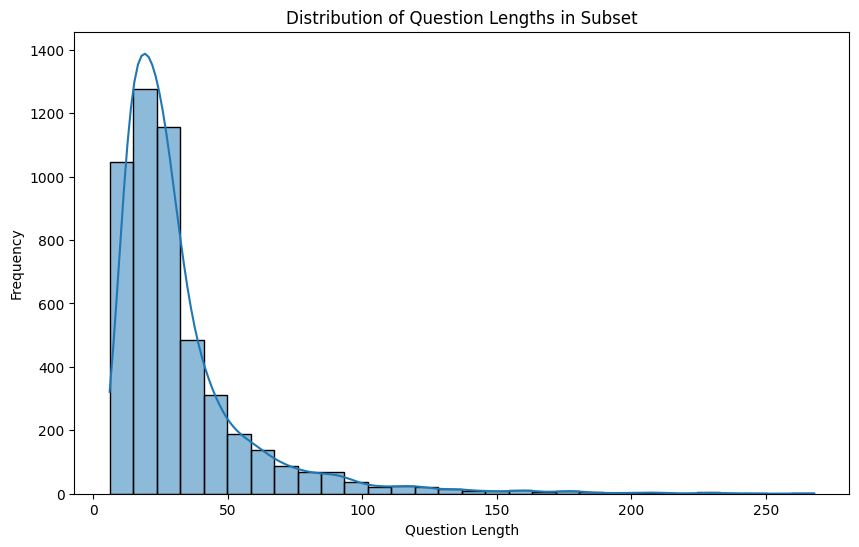

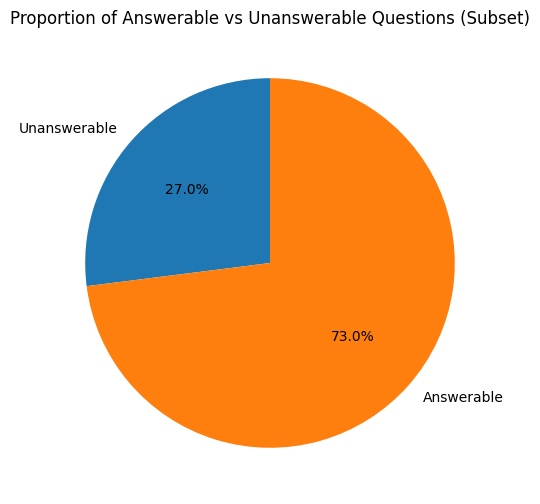

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of question lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_subset['question_length'], bins=30, kde=True)
plt.title('Distribution of Question Lengths in Subset')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

# Pie chart for answerable vs unanswerable questions
answerable_count = df_subset[df_subset['answerable'] == 1].shape[0]
unanswerable_count = df_subset[df_subset['answerable'] == 0].shape[0]
labels = ['Unanswerable', 'Answerable']
sizes = [unanswerable_count, answerable_count]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Answerable vs Unanswerable Questions (Subset)')
plt.show()


In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Download stopwords if needed
nltk.download('stopwords')

# Tokenize the questions and remove stopwords
stop_words = set(stopwords.words('english'))
all_words = []

for question in df_subset['question']:
    words = question.lower().split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    all_words.extend(words)

# Count word frequencies
word_counts = Counter(all_words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

# Display the top 10 most common words
print("Top 10 most common words:", top_words)

Top 10 most common words: [('this?', 1548), ('color', 477), ('kind', 413), ('tell', 407), ('thank', 292), ("what's", 281), ('you.', 237), ('please?', 200), ('say?', 183), ('please', 176)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


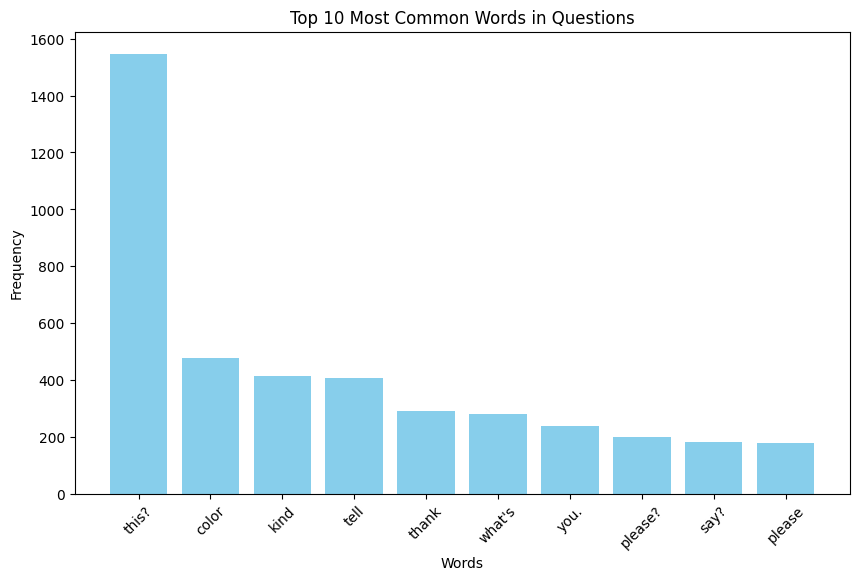

In [ ]:
# Bar chart for top 10 most common words
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

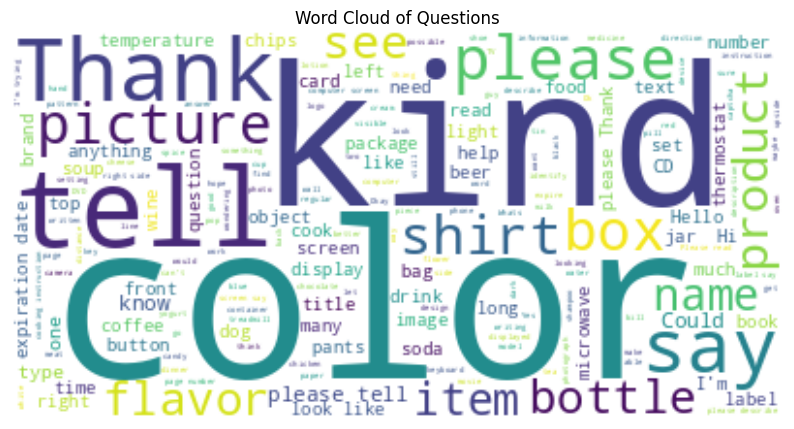

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
text = " ".join(df_subset['question'])
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Questions")
plt.show()